#                        **MOBILE PRICE PREDICTION**

Team name : Falcon

Members :

*   N Benjamin Studd
*   Karthik M D





# 1.   INTRODUCTION

Smartphones are not strange things for people anymore. Smartphones are mobile phones with computer abilities and internet search. It has become a source of entertainment and a communication tool for the vast population.

In this project we are going to analyze what all factors play an important part in the price of a particular mobile phone and develop an approximately accurate machine learning model. We will be exploring and analyzing a dataset we got from Kaggle. The dataset contains specifications of two thousand mobile phones. We will be applying different machine learning algorithms such as linear regression, logistic regression, decision tree and K-nearest neighbors(KNN).

We will then analyze all these models and evaluate their accuracy based on which we will come to the conclusion that a specific machine learning model works well for the particular dataset.




In [ ]:
# We will be using the following libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [ ]:
# We will be importing our datastet which is in a csv file
# Reading and storing the data from the csv file into a dataframe

df= pd.read_csv('data.csv')

# Exploratory Data Analysis

Lets take a look at the given dataset.

In [ ]:
df.head() #prints the first five rows of the dataset.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,19.0,0,0,1,1
1,1021,1,0.5,1,0.0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1,0,2
2,563,1,0.5,1,2.0,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1,0,2
3,615,1,2.5,0,0.0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0,0,2
4,1821,1,1.2,0,13.0,1,44.0,0.6,141,2,...,1208,1212,1411.0,8,2,15.0,1,1,0,1


In [ ]:
# Names of the columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Number of rows and columns in the dataset respectively
df.shape

(2000, 21)

There are 2000 rows/records and 21 columns.

The 'price_range' column depicts our target column and it has 4 categories namesly 0,1,2,3 which shows low cost to high cost price range.

Let's find out the data types of the columns in our dataset.

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram              float64
sc_h               int64
sc_w               int64
talk_time        float64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

We can see that all the columns are numerical. Hence we won't have the need to convert the data into a simplified form

Let's test our dataset for any irregularities such as missing values or outliers. As these tend to make our machine learning model less accurate, hence its appropriate to address these problems before we apply our machine learning algorithms.

In [ ]:
#checking for null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               1
four_g           0
int_memory       1
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              1
sc_h             0
sc_w             0
talk_time        1
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we can see there are null values in multiple columns. So now there are two ways to deal with it mainly that is :


*   By filling the missing values by mean/median or by zero.
*   By removing the rows which have missing values.

We will follow the second option as if we fill the missing values by zero it will lead to less accuracy as a particular feature like RAM, battery or anything else might be a must have feature of the phone hence it can't be kept zero.



In [ ]:
df.dropna(axis=0,inplace=True)

The rows containing null values have been removed.

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,...,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.00000,1997.00000
mean,1238.465699,0.495243,1.521933,0.509264,4.313470,0.521282,32.029544,0.502153,140.299950,4.524286,...,645.230846,1252.154231,2123.772158,12.305959,5.767151,11.011017,0.761142,0.502754,0.50676,1.49975
std,439.624109,0.500103,0.816273,0.500039,4.342534,0.499672,18.145168,0.288404,35.399179,2.287247,...,443.726329,432.056231,1084.252088,4.213732,4.355491,5.467785,0.426493,0.500118,0.50008,1.11809
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.00000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,876.000000,1208.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.00000,1.00000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,1.00000
75%,1616.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3064.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,2.00000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,3.00000


We can see the summary of our dataset above where it's mentioned the mean, median , standard deviations of each column respectively.

Now we will look at how different features affect the price range of a mobile phone.

<Axes: xlabel='price_range', ylabel='ram'>

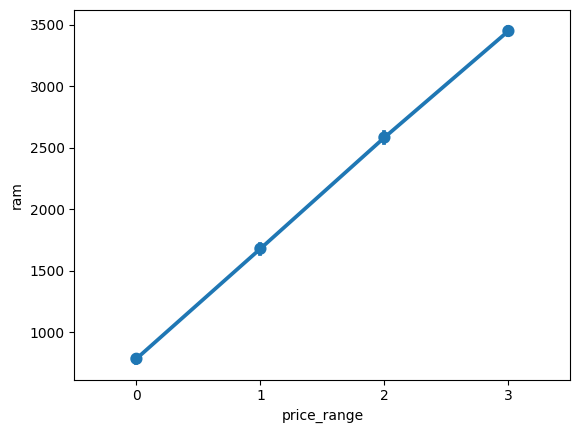

In [ ]:
#plotting a line plot to show how RAM  affects the price range of a mobile phone.

sns.pointplot(y="ram", x="price_range", data=df)


As we can see with the increase in RAM the price range increases.

Let's find the relation between battery and the duration for which we can talk on a phone.

<Axes: xlabel='price_range', ylabel='talk_time'>

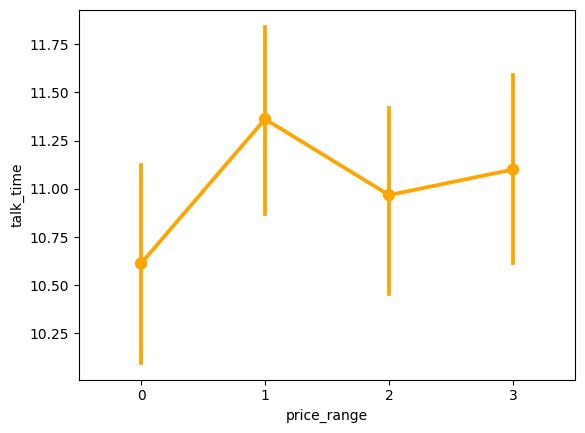

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=df,color='orange')

Now We will try to see the percentage of phones equipped with 4G cellular technology.

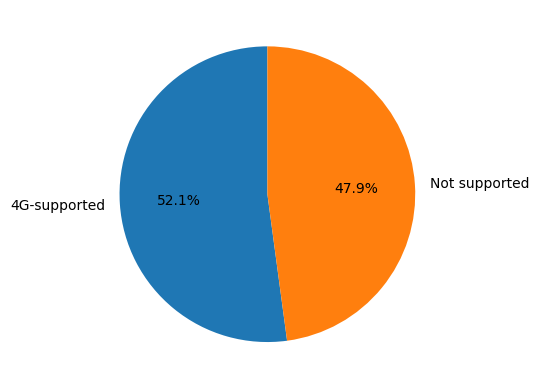

In [ ]:
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

Finding the price range of each category phone based on their battery amount using a boxplot.

<Axes: xlabel='price_range', ylabel='battery_power'>

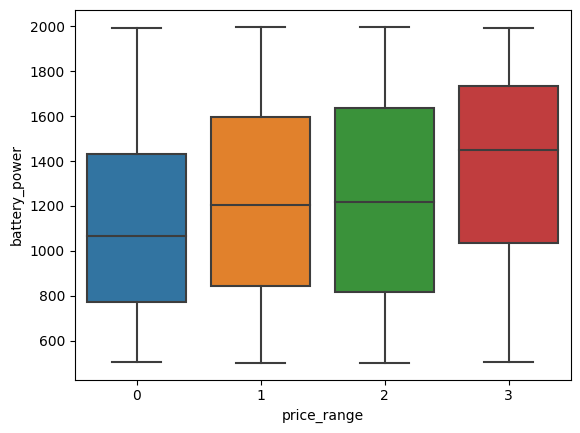

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=df)

As we can see the range of battery for the most high cost phones are between 1200 and 1800.

Similarly we will analyse how the amount of internal memory affects the price of a mobile.

<Axes: xlabel='price_range', ylabel='int_memory'>

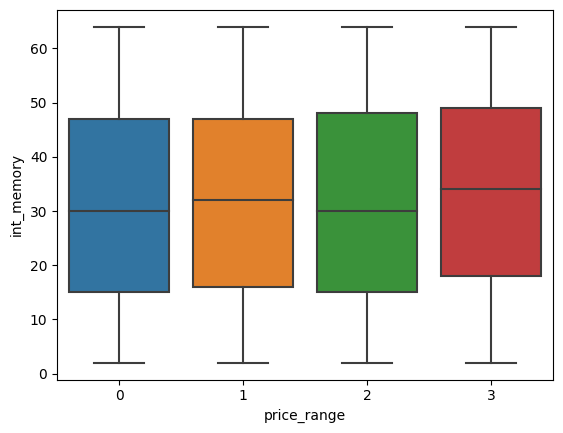

In [ ]:
sns.boxplot(x="price_range", y="int_memory", data=df)

We have four price ranges as target values and we will be applying different machine learning algorithms and find which one's the best suitable.

Given below is the price range distribution of the dataset.

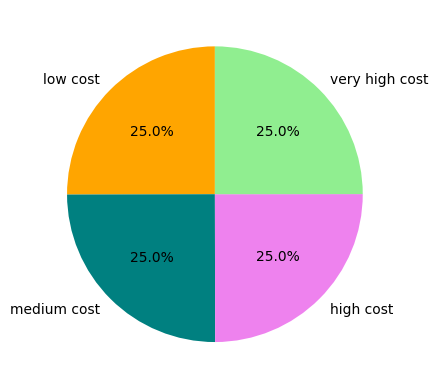

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
colors = ['orange','teal','violet', 'lightgreen']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [ ]:
y = df['price_range']
x = df.drop('price_range', axis = 1)

We will be splitting our dataset into 'training' and 'validation' dataset. And, we are going to see the accuracy of our models by applying them on validation dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100, stratify = y)

In [ ]:
# checking whether splitting is correct
print(x_train.shape)
print(x_test.shape)

(1397, 20)
(600, 20)


Before we start applying the machine learning algorithms, first we must analyse the correlation of features with the target feature. To do so we will be using a heatmap to plot the correlation.

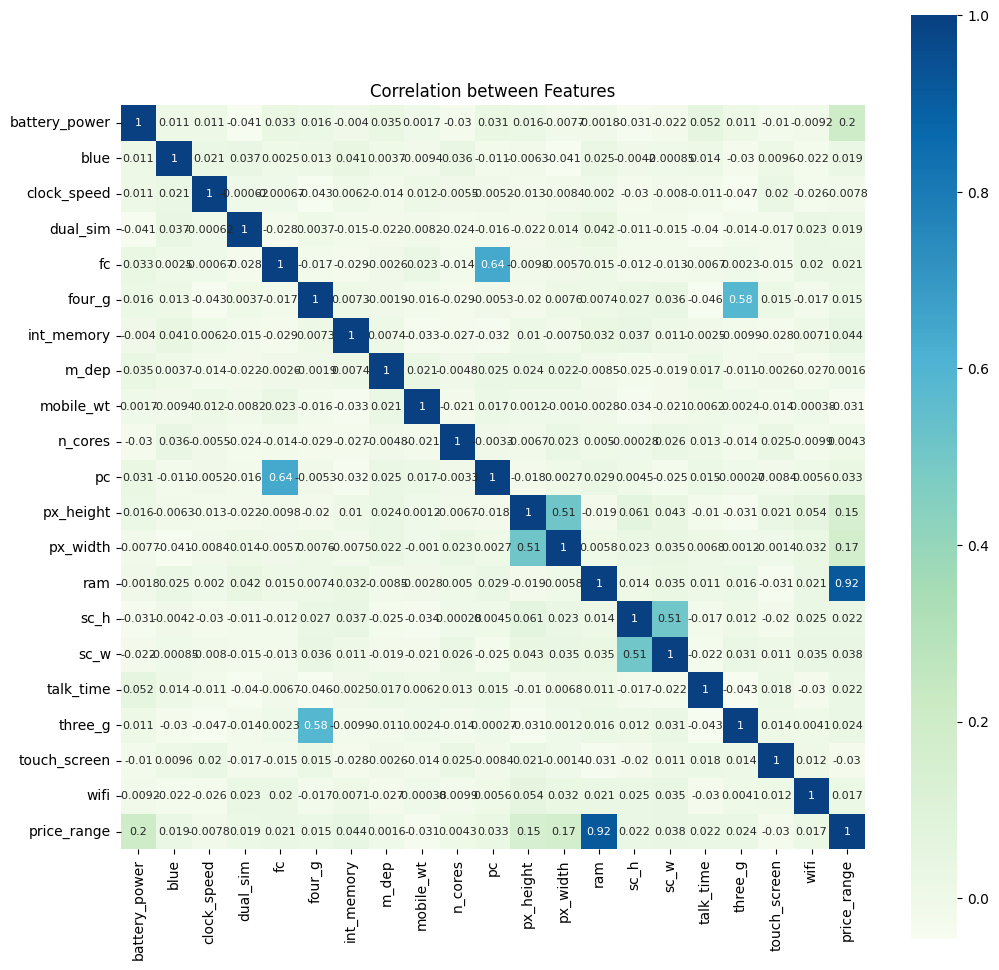

In [ ]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(df.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlation between Features')
plt.show ()



---



From the heatmap we can understand that the feature 'RAM' greatly affects the 'price range'.

Front camera megapixels(fc) and rear/primary camera(pc) megapixels are somewhat correlated with each other but they dont affect the price range much. Similarly 3G and 4G are correlated with each other.

From the heatmap we can also analyse and determine that there are not many attributes with high collinearity which means we don't get to face 'multicollinearity' problem.

Multicollinearity problem occurs whenever a independent variable is highly correlated with more than one independent variables this undermines the statistical significance of a independent variable.



---



As there are four price ranges in the target variable, hence this becomes a kind of multiclass classification.

# Implementation of Machine Learning Algorithms

For predicting the mobile phone prices, we will be applying  below mentioned algorithms respectively on the training and validation dataset. After that, we will choose the best model for our data set and then create target values for test dataset.



*   Linear Regression
*   Logistic regression
*   KNN
*   Random forest
*   Decision tree





# 1.   Linear Regression



In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Finding the R^2 score for the linear regression model

In [ ]:
acc_L=lr.score(x_test,y_test)
print("R2 Score for linear Regression: ",acc_L)

R2 Score for linear Regression:  0.9140868303545098


In [ ]:
#actual target values
print(y_test[:5].values)


[2 1 3 2 2]


In [ ]:
#predicted values by our linear regression model
preds = lr.predict(x_test)
print(preds[:5])


[2.10800127 1.15580039 2.3433061  1.56003767 2.19764201]


As we can see above its almost accurate.


---



# 2. Logistic Regression

1.   List item
2.   List item


As the target variables of the dataset are discrete, hence, we can apply logistic regression model.








In [ ]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [ ]:
y_pred= lr.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm


array([[135,  15,   0,   0],
       [ 37,  84,  26,   3],
       [  0,  36,  70,  44],
       [  0,   0,  26, 124]])

In [ ]:
#To find the accuracy of the model we will use accuracy_score

acc=accuracy_score(y_test,y_pred)
print("Accuracy of Logistic regression model is: ",round(acc,2))

Accuracy of Logistic regression model is:  0.69




---



#3. K-Nearest Neighbors (KNN)
'K' is the number of nearest training points with which we classify the target using the majority vote.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

[[146   4   0   0]
 [  9 132   9   0]
 [  0   6 136   8]
 [  0   0   9 141]]


In [ ]:
acc_knn=accuracy_score(y_test, y_pred_knn)
print("Accuracy Score of KNN Model: ",round(acc_knn,2))

Accuracy Score of KNN Model:  0.92


Earlier we did not know the optimum 'k'.
But we can find the optimum 'k' value using Grid Search or Randomized Search method and run knn model with this 'k'.

In [ ]:
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
print("Optimal Number of neighbors are : ",model.best_params_)

Optimal Number of neighbors are :  {'n_neighbors': 13}


Now we will run our model again with neighbors=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = knn.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[147   3   0   0]
 [  8 137   5   0]
 [  0   4 138   8]
 [  0   0   9 141]]


In [ ]:
acc_knn=accuracy_score(y_test, y_pred_knn)
print("Accuracy Score of KNN Model: ",round(acc_knn,2))

Accuracy Score of KNN Model:  0.94




---

# 4. Random Forest

Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy')
model_rf = rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[142   8   0   0]
 [ 20 119  11   0]
 [  0  21 116  13]
 [  0   0  12 138]]


In [ ]:
# Creating a confusion matrix
pd.crosstab(y_test, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,142,8,0,0
1,20,119,11,0
2,0,21,116,13
3,0,0,12,138


In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score of Random Forest: ",acc_rf)

Accuracy Score of Random Forest:  0.8583333333333333




---



#5. Decision Tree
Decision tree is one of the most popular supervised learning algorithm that is mostly used in Regression and Classification problems.

In [ ]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [ ]:
y_pred_dt = dt.predict(x_test)

After building the decision tree model, now, we will measure the performance of the model by means of confusion matrix:

In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

[[132  17   1   0]
 [ 17 116  17   0]
 [  0  16 119  15]
 [  0   0  18 132]]


In [ ]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       150
           1       0.78      0.77      0.78       150
           2       0.77      0.79      0.78       150
           3       0.90      0.88      0.89       150

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



Precision and recall metrics should be high as possible. They give the accuracy for different classes.

f1-score is used to compare models that have different precision and recall levels.

In [ ]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
print('Accuracy of Decision Tree: ',round(acc_dt,2))

Accuracy of Decision Tree:  0.83


# CONCLUSION
Now to determine which is the best model to be implemented on this particular dataset, we will be comparing the accuracy scores of all the models.

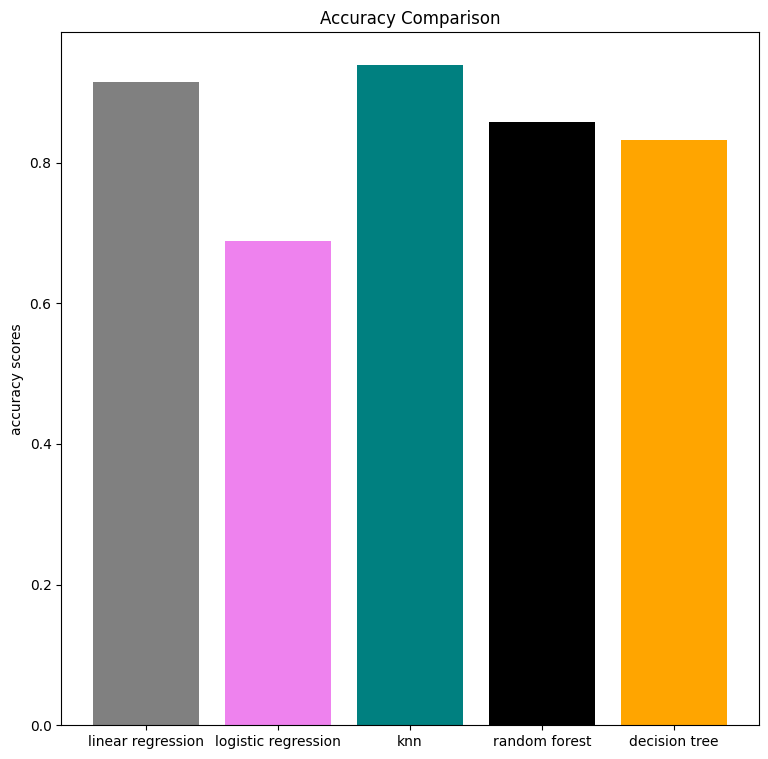

In [ ]:
#
models = ['linear regression','logistic regression', 'knn', 'random forest', 'decision tree']
acc_scores = [acc_L, acc,acc_knn, acc_rf, acc_dt]
fig = plt.subplots (figsize = (9, 9))
plt.bar(models, acc_scores, color=['gray', 'violet', 'teal', 'black','orange'])
plt.ylabel("accuracy scores")
plt.title("Accuracy Comparison")
plt.show()

* As we can see 'knn' has the most highest accuracy(0.94) of all the other models. Hence knn is the model that is the best for the given dataset.

* Finally now we will try to  run our KNN model to predict target values on the test dataset and add labels to dataset.

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
#dropping id column as it is not required
test_df=test_df.drop('id',axis=1)

In [ ]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
predicted_price_range = knn.predict(test_df)
# We are able to forecast/predict test dataset labels:
predicted_price_range[:20]

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1])

In [ ]:
test_df['price_range'] = predicted_price_range
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


Therefore, We have successfully achieved our goal in predicting the price range for mobile phones in the new test dataset which earlier didn't have any predictions/target labels.